# Bank Churn Prediction

### Project Introduction
* Customer relation is key for banking success. XYZ multistate bank is keen on retaining its account holders.
* XYZ bank intend to use Machine Learning techniques to predict, minimize churn based on customer data.

### About Dataset

This dataset is for XYZ multistate bank with following columns:
* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

### Objectives
* Data cleansing, data preparation, data preprocessing
* Exploratory Data Analysis(EDA)
* Build and optimize machine learning models using a pipeline and crossvalidation to tune its hyperparameters:
  * Random Forest
  * Logistic Regression
* Model evaluation using metrix recall, roc auc score, f1-score, confusion matrix
* Extract feature importance from trained pipeline
* Conclusion

In [298]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [386]:
# Load dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [302]:
print('Dimension of data set:', train.shape)

Dimension of data set: (165034, 14)


There are total 165034 rows and 14 columns in the dataset.

### Data Preparation and Explore

In [306]:
# replace empty space with Nan value
train.replace(' ', np.nan, inplace=True)


In [308]:
# check missing values for each column
missing = train.isnull()
l = missing.columns.values.tolist()
for col in l:
    print(missing[col].value_counts(), '\n')


id
False    165034
Name: count, dtype: int64 

CustomerId
False    165034
Name: count, dtype: int64 

Surname
False    165034
Name: count, dtype: int64 

CreditScore
False    165034
Name: count, dtype: int64 

Geography
False    165034
Name: count, dtype: int64 

Gender
False    165034
Name: count, dtype: int64 

Age
False    165034
Name: count, dtype: int64 

Tenure
False    165034
Name: count, dtype: int64 

Balance
False    165034
Name: count, dtype: int64 

NumOfProducts
False    165034
Name: count, dtype: int64 

HasCrCard
False    165034
Name: count, dtype: int64 

IsActiveMember
False    165034
Name: count, dtype: int64 

EstimatedSalary
False    165034
Name: count, dtype: int64 

Exited
False    165034
Name: count, dtype: int64 



In [310]:
# check and summarize missing values in each column
train.isnull().sum()


id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing data

In [313]:
# check duplicates
len(train.drop_duplicates())


165034

No duplicates


In [316]:
train.count()

id                 165034
CustomerId         165034
Surname            165034
CreditScore        165034
Geography          165034
Gender             165034
Age                165034
Tenure             165034
Balance            165034
NumOfProducts      165034
HasCrCard          165034
IsActiveMember     165034
EstimatedSalary    165034
Exited             165034
dtype: int64

In [318]:
# drop columns that won't be used for this analysis

train= train.drop(columns=(['id','CustomerId','Surname']), axis=1)
train.shape


(165034, 11)

After data preparation, there are total 165034 rows and 11 columns remain.

In [321]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [323]:
# check basic statistical info
train.describe(include='all')


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034,165034,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,94215,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,656.454373,NaN,NaN,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,NaN,NaN,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,NaN,NaN,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000


Findings from describe():
* There are more male customers than female customers.
* The number of French customers is higher than that of German and Spainish.
* Average of credit score is 656, age of customer is 38, tenure is 5 years, bank account balance is $55478.
* Average of churn percentage is 21%

### Exploratory Data Analysis (EDA)

#### Age Distribution

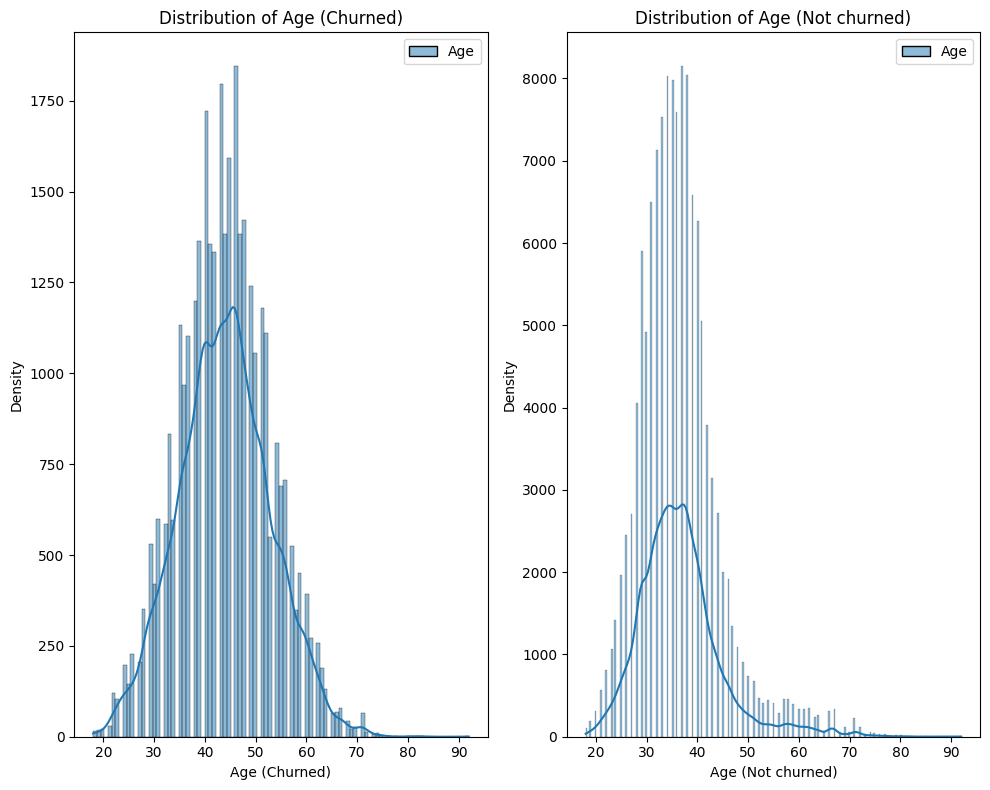

In [328]:
# 1 --> churned    0 --> not churned
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
sns.histplot(train.loc[train.Exited == 1] [['Age']],kde=True,color='grey', ax=axes[0])
axes[0].set_title('Distribution of Age (Churned)')
axes[0].set_xlabel('Age (Churned)')
axes[0].set_ylabel('Density')

sns.histplot(train.loc[train.Exited == 0] [['Age']],kde=True,color='grey', ax=axes[1])
axes[1].set_title('Distribution of Age (Not churned)')
axes[1].set_xlabel('Age (Not churned)')
axes[1].set_ylabel('Density')
plt.tight_layout()
plt.savefig('age_dis.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()


* The histogram on the left indicates that customers aged 40 to 50 has the highest churn rate.
* The histogram on the right indicates that customers aged 30 to 40 are less likely to churn.

#### Tenure Distribution

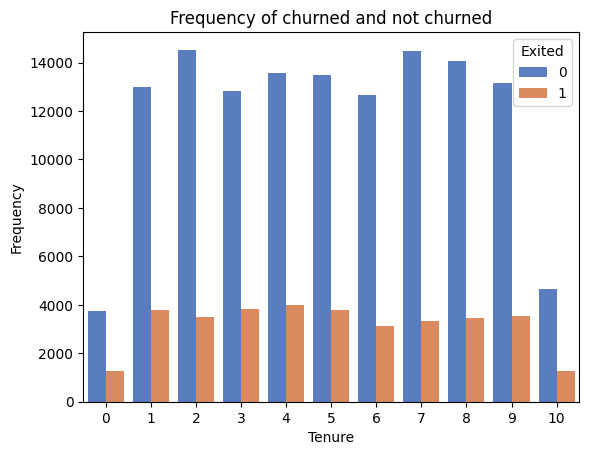

In [332]:
tenure = train.groupby(['Tenure','Exited']).size().reset_index(name='Frequency')
sns.barplot(x='Tenure', y='Frequency', hue='Exited',data=tenure,palette='muted')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Frequency of churned and not churned')
plt.savefig('tenure_dis.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

* Customers who has the least tenure(new customers) and the most tenure (long term/ loyal customers) less likely to churn.
* Customers who has 1 to 9 years tenure have similar churn rate.

#### Gender Distribution

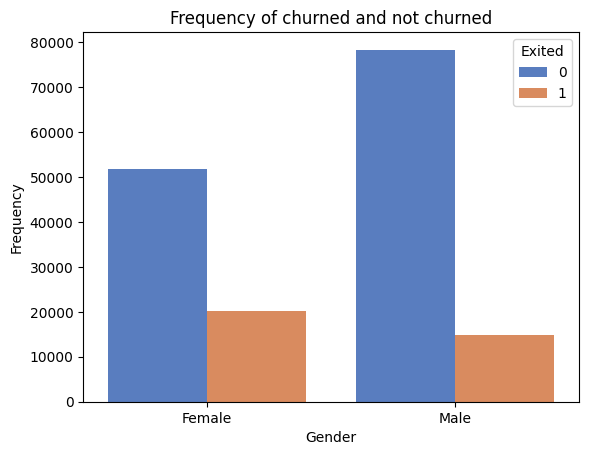

In [336]:
gender = train.groupby(['Gender','Exited']).size().reset_index(name='Frequency')
sns.barplot(x='Gender', y='Frequency', hue='Exited',data=gender,palette='muted')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of churned and not churned')
plt.savefig('gender_dis.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()


* The bar chart shows that the bank has about 32% more male customers than femal customers.
* It also shows that there is no significant difference in churn between genders.

#### Geography Distribution

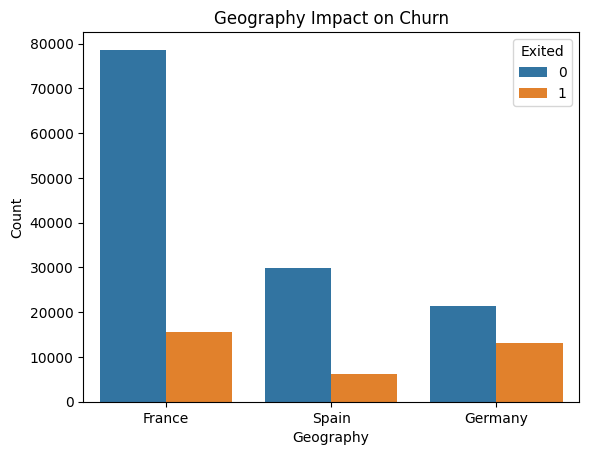

In [340]:

sns.countplot(data=train, x='Geography',hue='Exited')
plt.ylabel('Count')
plt.title('Geography Impact on Churn')
plt.savefig('geography_dis.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

#### NumOfProducts Impact on Churn

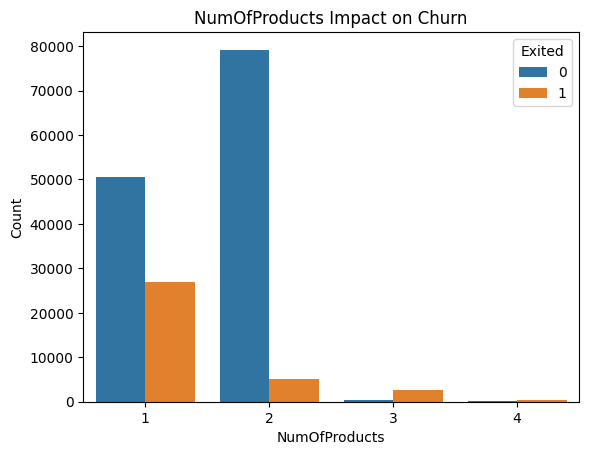

In [343]:

sns.countplot(data=train, x='NumOfProducts',hue='Exited')
plt.ylabel('Count')
plt.title('NumOfProducts Impact on Churn')
plt.savefig('numofproducts_dis.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

Account holders with fewer products (with 2 or less products) are more likely to churn.

#### Target (Exited / Churn) Distribution

In [347]:
train.Exited.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [349]:
train.Exited = train.Exited.map(lambda x:'Yes' if x==1 else 'No')

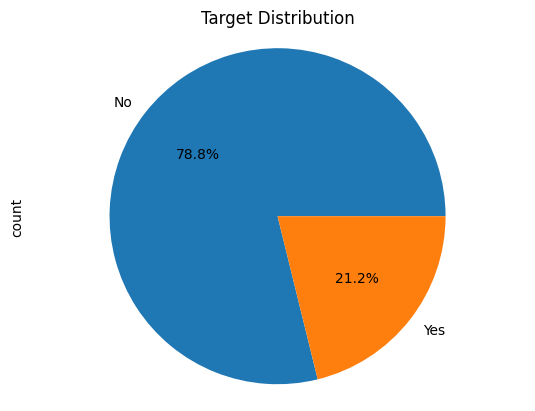

In [351]:

target = train['Exited'].value_counts()
target.plot(kind='pie',
              autopct='%1.1f%%',                                                          
              )
plt.axis('equal')
plt.title('Target Distribution')
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

### Data Preprocessing

Split data into training and testing datasets

In [355]:
X = train.drop('Exited',axis=1)
y = train.Exited
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Auto detect numerical and categorical columns, assign them to separate features

In [358]:
# select numerical features
num_features = X_train.select_dtypes('number').columns.tolist()

# Select categorical features
cat_features = X_train.select_dtypes(['object','category']).columns.tolist()

##### Using Pipeline class from Scikit-Learn for streamlining data preprocessing and model training into a single, coherent sequence.

Define separate preprocessing pipelines for both feature types

In [362]:

# normalize all numerical features
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# OneHotEncode all categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Combine the transformers into a single column transformer

In [365]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])


## Modeling

### Model 1 Random Forest

Create a model pipeline

In [370]:

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipe_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Define a parameter grid

Use the grid in a cross validation search to optimize the model

In [374]:
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

Perform grid search cross-validation and fit the best model to the training data

In [377]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

Train the pipeline model

In [380]:
rf_model = GridSearchCV(estimator=pipe_rf, param_grid=param_grid_rf, cv=cv, scoring='accuracy', verbose=2)
rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   8.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   8.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   8.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  15.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  16.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  15.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   8.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=50; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'HasCrCard',
                                                                          'IsActiveMember',
                                                                          'EstimatedSalary']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

Get the model predictions from the grid search estimator on the test data

#### Classification Report for Model 1 Random Forest

In [382]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

          No       0.88      0.96      0.92     26023
         Yes       0.77      0.50      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



ROC AUC for Model 1 Random Forest

In [83]:
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
print('Model 1 (Random Forest) ROC AUC score is:', roc_auc_score(y_test, y_prob_rf))

Model 1 (Random Forest) ROC AUC score is: 0.8863692326274594


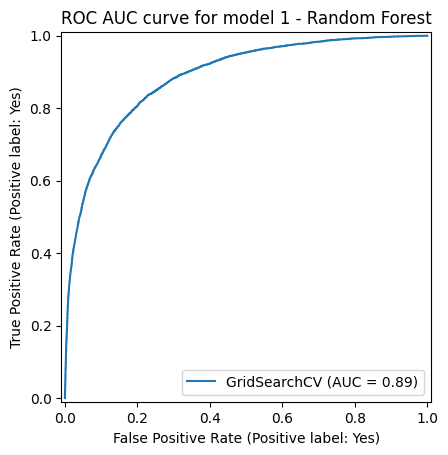

In [84]:
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('ROC AUC curve for model 1 - Random Forest')
plt.savefig('roc_curve_rf_model.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

Plot the confusion matrix

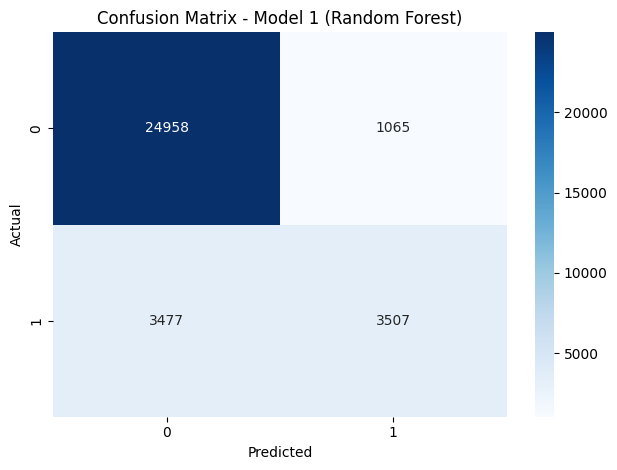

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix - Model 1 (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix_rf_model.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

In [92]:
feature_importances = rf_model.best_estimator_['classifier'].feature_importances_

feature_names = num_features + list(rf_model.best_estimator_['preprocessor']
                                   .named_transformers_['cat']
                                   .named_steps['onehot']
                                   .get_feature_names_out(cat_features))

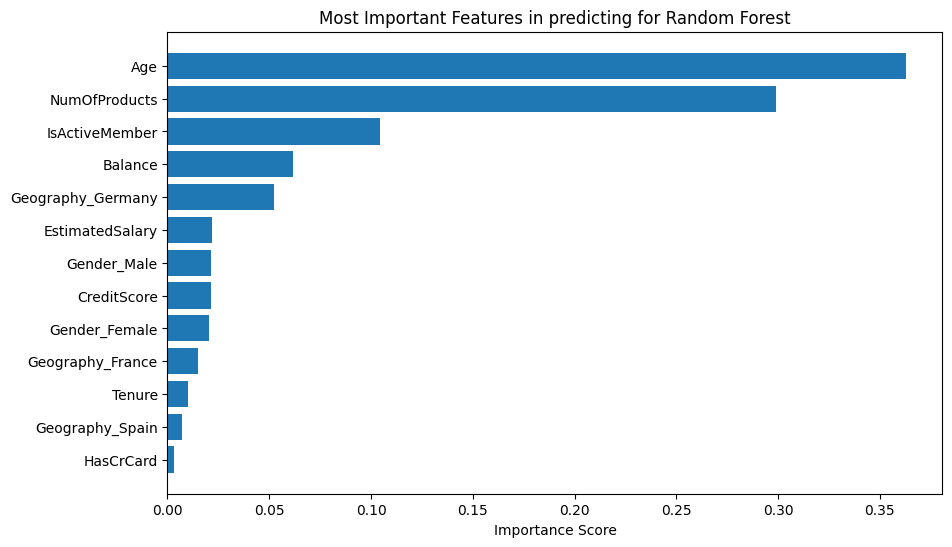


Test set accuracy:  86.24%


In [98]:
importance_df_r = pd.DataFrame({'Feature': feature_names,
                             'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(importance_df_r['Feature'], importance_df_r['Importance'])
plt.title('Most Important Features in predicting for Random Forest')
plt.xlabel('Importance Score')
plt.savefig('feature_importance_rf_model.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

test_score_rf = rf_model.best_estimator_.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score_rf: .2%}")

The Top 5 Importance features in Model 1 Random Forest:

In [101]:

importance_df_r = importance_df_r.sort_values(by='Importance', ascending=False)
importance_df_r[:5]


,Feature,Importance
1,Age,0.362650
4,NumOfProducts,0.299002
6,IsActiveMember,0.104191
3,Balance,0.061750
9,Geography_Germany,0.052207


The top five important features for model 1 Random Forest are: Age, NumOfProducts, IsActiveMember, Balance, Geography_Germany.

### Model 2 Logistic Regression

Create a model pipeline and define a hyperparameter grid

In [106]:
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

param_grid_lr = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

Use the grid in a cross validation search to optimize the model


Perform grid search cross-validation and fit the best model to the training data

In [114]:
lr_model = GridSearchCV(estimator=pipe_lr, param_grid=param_grid_lr, cv=cv, scoring='accuracy', verbose=2)

# Train the pipeline model
lr_model.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   2.5s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   2.8s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   2.5s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__class_weight=balanced, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.4s
[CV] END classifier__class_weight=balanced, classifier__penalty=l1, classifier__solver=liblinear; total time=   9.9s
[CV] END classifier__class_w

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'HasCrCard',
                                                                          'IsActiveMember',
                                                                          'EstimatedSalary']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy', verbose=2)

#### Classification Report for Model 2 Logistic Regression

In [116]:
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          No       0.85      0.95      0.90     26023
         Yes       0.69      0.38      0.49      6984

    accuracy                           0.83     33007
   macro avg       0.77      0.67      0.70     33007
weighted avg       0.82      0.83      0.81     33007



ROC AUC for Model 2 Logistic Regression

In [119]:
y_prob_lr = lr_model.predict_proba(X_test)[:,1]
print('Model 2 (Logistic Regression) ROC AUC score is:', roc_auc_score(y_test, y_prob_lr))

Model 2 (Logistic Regression) ROC AUC score is: 0.8144870655657108


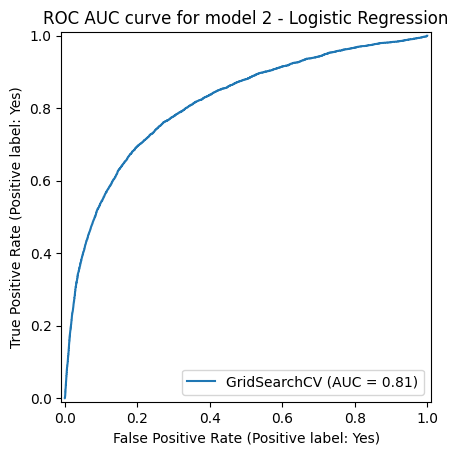

In [121]:
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title('ROC AUC curve for model 2 - Logistic Regression')
plt.savefig('roc_curve_lr_model.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

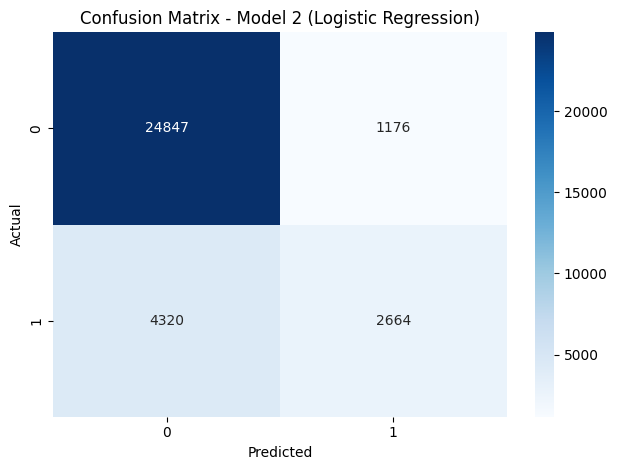

In [123]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix - Model 2 (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrix_lr_model.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

Feature Importance

In [126]:
coefficients = lr_model.best_estimator_.named_steps['classifier'].coef_[0]

num_feature_names = num_features
cat_feature_names = (lr_model.best_estimator_.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .named_steps['onehot']
                    .get_feature_names_out(cat_features)
                    )
feature_names = num_feature_names + list(cat_feature_names)

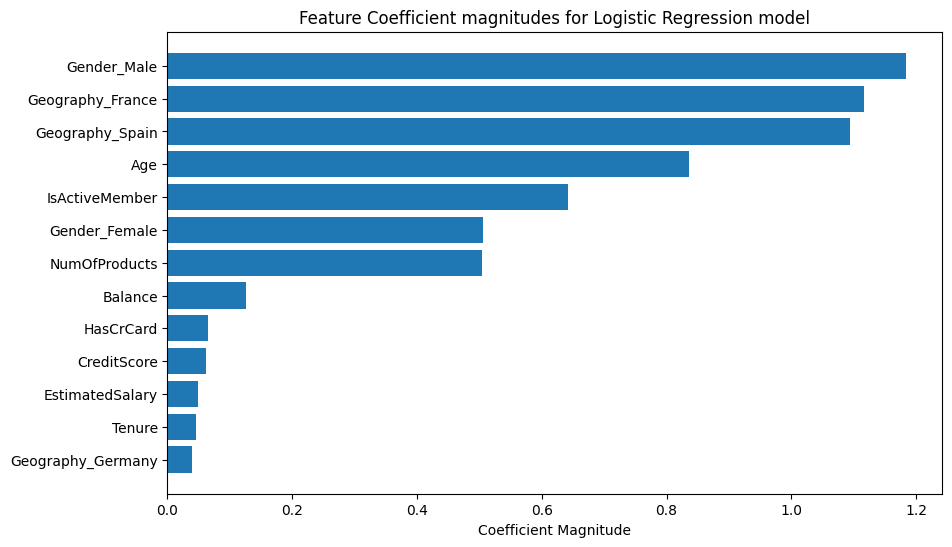


Test set accuracy: 83.35%


In [132]:
# Create a DataFrame for the coefficients
importance_df_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs)  # Sort by absolute values

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df_lr['Feature'], importance_df_lr['Coefficient'].abs())
#plt.gca().invert_yaxis()
plt.title('Feature Coefficient magnitudes for Logistic Regression model')
plt.xlabel('Coefficient Magnitude')
plt.savefig('feature_importance_lr_model.png', dpi=300, bbox_inches='tight')  # You can change the file format and name
plt.show()

# Print test score
test_score_lr = lr_model.best_estimator_.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score_lr:.2%}")

The Top 5 Important features in Model 2 Logistic Regression:

In [135]:
importance_df_lr['Coefficient']=importance_df_lr['Coefficient'].abs()
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
importance_df_lr[:5]


,Feature,Coefficient
12,Gender_Male,1.183180
8,Geography_France,1.116289
10,Geography_Spain,1.093797
1,Age,0.836526
6,IsActiveMember,0.641585


The top five important features for model 2 Logistic Regression are: Gender_Male, Geography_France, Geography_Spain, Age, IsActiveMember.

Classification Report

In [139]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

          No       0.88      0.96      0.92     26023
         Yes       0.77      0.50      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



In [141]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

          No       0.85      0.95      0.90     26023
         Yes       0.69      0.38      0.49      6984

    accuracy                           0.83     33007
   macro avg       0.77      0.67      0.70     33007
weighted avg       0.82      0.83      0.81     33007



In [143]:
print(f'Model 1 Random Forest accuracy score is: {accuracy_score(y_test, y_pred_rf)*100:.2f}%')
print()
print(f'Model 2 Logistic Regression accuracy score is: {accuracy_score(y_test, y_pred_lr)*100:.2f}%')

Model 1 Random Forest accuracy score is: 86.24%

Model 2 Logistic Regression accuracy score is: 83.35%


### Model Selection 
* Random Forest model performs better than Logistic Regression model in predicting XYZ bank customer churn with higher recall, roc auc score and accuracy score.


### Predict Test Data Set 
* Using Random Forest best fit model to predict test dataset

In [391]:

# predict the test data and create a submission file of probability of each class
y_pred = rf_model.predict_proba(test.drop(['id', 'CustomerId', 'Surname'], axis=1))

submission['Exited'] = y_pred[:, 1]
submission.to_csv('submission.csv', index=False)
